# DI 501: Introduction to Data Informatics 

## Assignment 2

### Due: April 14, Sunday by 23:30
---

### Submission and Grading Principles

**Assignment Submission Guidelines:**

* Submit your assignments via the assignment module on [ODTUClass](https://odtuclass.metu.edu.tr).

* You will work on this file, and rename it as "*name_surname_a2.ipynb*" (e.g., "*volga_sezen_a2.ipynb*").

* Late submissions will be accepted until April 18th, Thursday by 23:30, with a 10% penalty per day.

* **<font color=#C91515>This is an individual assignment; do not collaborate, and uphold academic integrity principles.</font>**

* Offer insightful commentary about your results. Data understanding relies on your reasoning; not just numbers, tables, or graphics.
<br>**<font color=#C91515>Failing to do so will result in grade penalties. (Up to 50% of a given question.)</font>**

* Use multiple code blocks when multiple outputs are necessary, but graphs have to be compacted by using subplots whenever appropriate.

* Place your comments in markdown blocks (like this one), and use markdown notation used here to make reading easier. \
*(Double click here to look at the markdown code. Press esc to go back.)*

**Make sure printouts and graphs are visible before submission.**

------------

### The aim of this assignment is getting you familiar with:

* Model training and evaluation

* Feature engineering

* Designing random experiments

* Statistical intuition

------------

### Dataset Description

In this assignment you will work with data in the aptly named "data.csv". It has 3 features, one target, and 100000 observations. This dataset was was generated with random variables and a pre-determined function, and has no bearing on real life. 

But while going through the questions assume this dataset is important, and you want to know the relationship between the variables and the target.

------------

### 0) Import relevant libraries and the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

C:\Users\ibrah\AppData\Local\Temp\ipykernel_4208\1349693520.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1) Quick inspection and data preparation (10p)

* Randomly sample 1% of rows to generate a `sns.pairgrid` plot. Comment on the distributions and possible relationships.

* Prepare different subsets of the data for the purpose of training and testing:

    * Order the data in a descending fashion according to the target (y). Select 30 rows such that they are separated by 3333 rows. Remove and save these rows as "**strd_test**".

    * Randomly split the rest of the data into training and test sets where the ratio should be 80/20. (Use your student ID as the `random_state`)

In [2]:
df = pd.read_csv(r"C:\Users\ibrah\OneDrive\Masaüstü\DI501\assignments\2nd_assignment\data.csv")

In [3]:
df.head(10)

,x1,x2,x3,y
0,-12.290984,6.000892,2.313386,-346.891541
1,-11.597340,14.666316,2.866056,-643.717833
2,-11.048471,13.863895,4.138679,-674.199226
3,-15.718046,7.584714,2.302988,-479.038442
4,-9.326687,11.997587,3.414876,-465.822207
5,-16.552700,12.560599,4.996949,-1120.332719
6,-11.815523,13.482050,3.435761,-686.892408
7,-8.901347,8.583897,3.254008,-388.028486
8,-4.953892,13.643775,4.329669,-27.678642
9,-14.465860,12.863197,2.673127,-784.007047


In [4]:
df.shape

(100000, 4)

In [5]:
df.describe()

,x1,x2,x3,y
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,-9.991274,10.095936,3.385680,-459.692797
std,3.246986,0.584113,0.935953,216.874904
min,-23.184649,6.000892,2.003796,-1808.653902
25%,-12.188171,9.606047,2.755281,-606.963744
50%,-9.994643,10.095692,3.159189,-479.184058
75%,-7.783897,10.581166,3.776587,-330.152828
max,3.577385,14.666316,12.891773,986.263494


These statistics provide insights into the distribution and central tendencies of the data in each column.<br>
Count: Indicates the number of non-null values in each column. All columns have 100,000 non-null values, suggesting that there are no missing values in the dataset. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      100000 non-null  float64
 1   x2      100000 non-null  float64
 2   x3      100000 non-null  float64
 3   y       100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


All columns have the data type float64, indicating they contain floating-point numbers.

In [7]:
sampled_df = df.sample(frac=0.01, random_state=2698215)

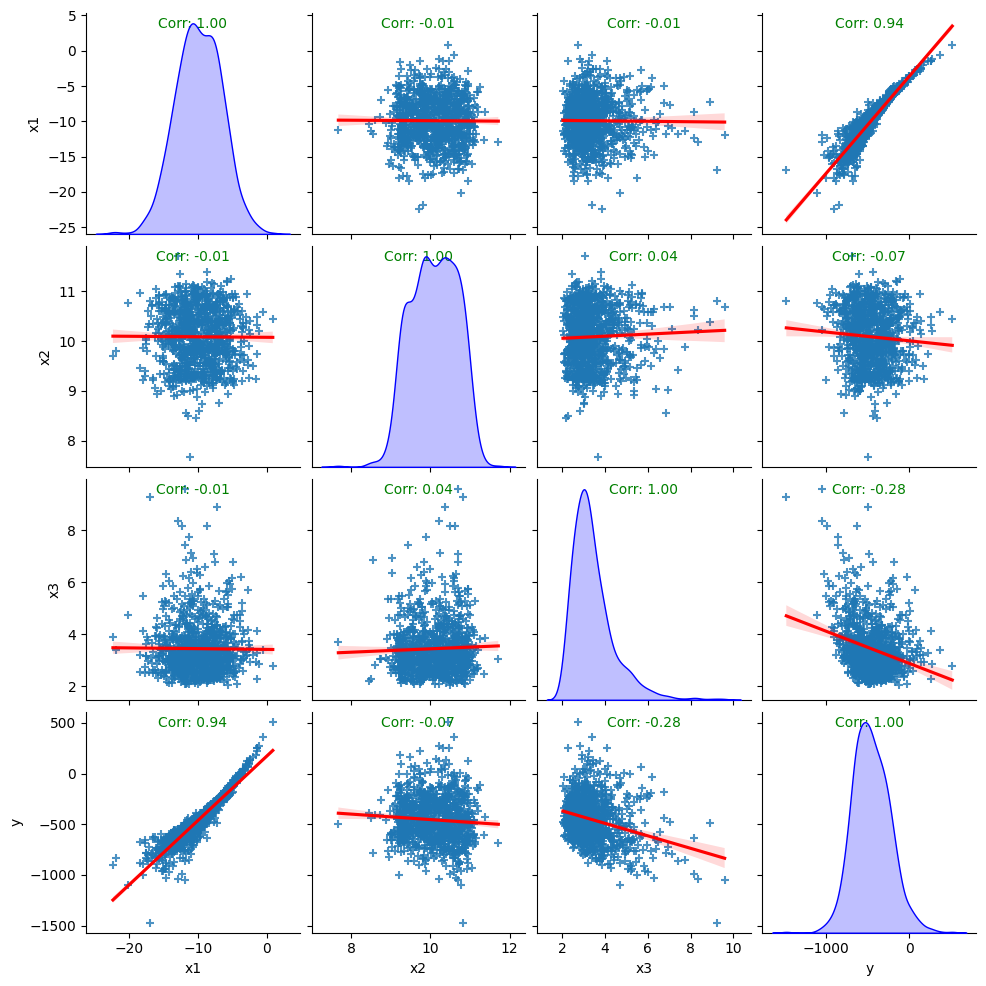

In [8]:
pair_plot = sns.pairplot(sampled_df, kind='reg', diag_kind='kde', markers='+', plot_kws={'line_kws':{'color':'red'}}, diag_kws={'color':'blue'})

corr = sampled_df.corr().values
for i, (ax, coef) in enumerate(zip(pair_plot.axes.flat, corr.flatten())):
    ax.annotate(f"Corr: {coef:.2f}", (0.5, 0.95), xycoords='axes fraction', ha='center', va='center', fontsize=10, color='green')

plt.show()

The KDE plot for x1 indicates a unimodal distribution that is slightly negatively skewed, with a peak around the mean. The spread of values appears to be relatively uniform, with no significant skewness or outliers observed.<br>

The KDE plot for x2 shows a unimodal distribution that is possibly slightly negatively skewed, with a peak around the mean. There are potential outliers on both ends of the distribution.<br>

The KDE plot for x3 exhibits a unimodal distribution with a peak around the mean. There is a positive skewness towards the higher end of the distribution, with possible outliers observed.<br>

* There is a strong positive linear relationship between x1 and y, as indicated by a correlation coefficient of 0.937672.
* There is a weak negative linear relationship between x2 and y, as indicated by a correlation coefficient of -0.069122.
* There is a weak negative linear relationship between x3 and y, as indicated by a correlation coefficient of -0.276868.
* The other correlations are close to zero, indicating weak or no linear relationships between those pairs of variables.

In [9]:
df_sorted = df.sort_values(by='y', ascending=False)

In [10]:
strd_test = df_sorted.iloc[::3333][:30]
df_remaining = df_sorted.drop(index=strd_test.index)

In [11]:
X = df_remaining.drop(columns=['y'])
y = df_remaining['y']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2698215)

In [13]:
print("Shape of strd_test:", strd_test.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of strd_test: (30, 4)
Shape of X_train: (79976, 3)
Shape of X_test: (19994, 3)
Shape of y_train: (79976,)
Shape of y_test: (19994,)


### 2) Model training (15p)

* Train a linear regression model using the training portion of the data. Print out the intercept and coefficients.

* Evaluate the model's performance over the test set. (Remember, $R^2$ isn't everything.)

* Retrain the linear regression with `fit_intercept` parameter set to false. How do the model parameters and performance respond to this change? What is the role of the intercept/bias term?

* Comment on the statistical significance of the estimated parameters utilizing statsmodels functions. (If the intercept is important, include it by adding a column filled with 1.) Does any variable have a higher explanatory power in predicting y?

In [14]:
# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

print("Intercept:", linear_reg.intercept_)
print("Coefficients:", linear_reg.coef_)

Intercept: 560.940250512618
Coefficients: [ 62.96783225 -19.07956439 -58.73443655]


Intercept: The intercept represents the predicted value of the target variable when all independent variables are zero. In this case, the intercept is approximately 560.94. This means that when the values of x1, x2, and x3 are all zero, the predicted value of y is approximately 560.94.<br>

Coefficients: The coefficients represent the change in the target variable for a one-unit change in each independent variable, holding all other variables constant.
   * A one-unit increase in x1 results in an increase of approximately 62.97 in the predicted value of y, assuming x2 and x3 are held constant.
   * A one-unit increase in x2 results in a decrease of approximately 19.08 in the predicted value of y, assuming x1 and x3 are held constant.
   * A one-unit increase in x3 results in a decrease of approximately 58.73 in the predicted value of y, assuming x1 and x2 are held constant.<br>
<br>

y = 560.94 + 62.97 * x1 - 19.08 * x2 - 58.73 * x3 + ε

In [15]:
y_pred = linear_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = linear_reg.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r_squared)

Mean Squared Error (MSE): 2179.230739892239
Mean Absolute Error (MAE): 31.82349906564704
Root Mean Squared Error (RMSE): 46.68223152219952
R-squared (Coefficient of Determination): 0.9523664806657628


* Mean Squared Error (MSE): The model's MSE of approximately 2179.24 units reflects the average squared deviation between predicted and actual values. Lower MSE indicates better predictive accuracy.
* Mean Absolute Error (MAE): With an MAE of around 31.65 units, the model exhibits the average absolute deviation between predicted and actual values. Lower MAE signifies better prediction precision.
* Root Mean Squared Error (RMSE): The model's RMSE, approximately 46.68 units, serves as a measure of the typical magnitude of prediction errors. Lower RMSE indicates better predictive performance.
* R-squared (Coefficient of Determination): The R-squared value, approximately 0.9524, signifies the proportion of variance in the target variable explained by the model. Higher R-squared values suggest a better fit of the model to the data.<br>

**In summary, while these evaluation metrics individually gauge the model's performance, they are most informative when utilized for comparing different models, enabling researchers to identify the most effective model for their specific dataset and objectives.**

In [16]:
from sklearn.linear_model import LinearRegression

# Retrain the linear regression model with fit_intercept set to False
linear_reg_no_intercept = LinearRegression(fit_intercept=False)
linear_reg_no_intercept.fit(X_train, y_train)

# Print out the coefficients
print("Coefficients (no intercept):", linear_reg_no_intercept.coef_)

# Evaluate the model's performance over the test set
y_pred_no_intercept = linear_reg_no_intercept.predict(X_test)
mse_no_intercept = mean_squared_error(y_test, y_pred_no_intercept)
mae_no_intercept = mean_absolute_error(y_test, y_pred_no_intercept)
rmse_no_intercept = np.sqrt(mse_no_intercept)
r_squared_no_intercept = linear_reg_no_intercept.score(X_test, y_test)

print("Mean Squared Error (no intercept):", mse_no_intercept)
print("Mean Absolute Error (no intercept):", mae_no_intercept)
print("Root Mean Squared Error (no intercept):", rmse_no_intercept)
print("R-squared (no intercept):", r_squared_no_intercept)

Coefficients (no intercept): [ 61.28397079  32.3987877  -52.05073888]
Mean Squared Error (no intercept): 3171.834866674843
Mean Absolute Error (no intercept): 40.18628789350511
Root Mean Squared Error (no intercept): 56.31904532815558
R-squared (no intercept): 0.9306701880250483


The intercept term, also known as the bias term, serves two crucial roles in linear regression:<br>

- Capturing Baseline Value: The intercept represents the value of the dependent variable when all independent variables are zero. It captures the baseline or average value of the dependent variable in the absence of any influence from the predictors.<br>
- Providing Flexibility: Including the intercept allows the regression line to have flexibility in its placement relative to the origin. This flexibility ensures that the regression model can accurately represent the relationship between variables, even when the predictors do not have meaningful interpretations at zero.<br>


When the intercept term is excluded, the linear regression model is restricted to intersect the origin. Consequently, this constraint can lead to alterations in both the model's parameters and its performance metrics in comparison to when the intercept term is included. In this instance, although the model continues to exhibit satisfactory performance, there is a marginal decrement in the metrics when contrasted with the model containing the intercept term. This observation implies that the intercept term may play a pivotal role in capturing supplementary variability within the data that cannot be adequately explained solely by the features.

In [17]:
X_train_with_intercept = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 5.455e+05
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:22:30   Log-Likelihood:            -4.2134e+05
No. Observations:               79976   AIC:                         8.427e+05
Df Residuals:                   79972   BIC:                         8.427e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        560.9403      2.986    187.874      0.0

1. R-squared and Adjusted R-squared:
* The R-squared value is approximately 0.953, indicating that the model explains about 95.3% of the variance in the dependent variable y. This suggests that the independent variables collectively account for a large portion of the variability observed in y.
* The Adjusted R-squared value, which adjusts for the number of predictors in the model, is also approximately 0.953. This indicates that the inclusion of the independent variables improves the model fit without overfitting.
2. Statistical Significance:
* The t-values associated with each coefficient provide information about the significance of the variables in predicting y.
* All three independent variables have statistically significant coefficients, as indicated by their large absolute t-values.
* The p-values associated with each coefficient are very low (p < 0.001), further confirming the statistical significance of the variables.
3. Overall Model Fit:
* The F-statistic is very large (5.455e+05) with a corresponding p-value close to zero, indicating that the overall regression model is statistically significant.
* This suggests that the independent variables collectively have a significant effect on the dependent variable y.<br>

In summary, the regression model provides a good fit to the data, with high R-squared and Adjusted R-squared values and statistically significant coefficients. All three independent variables (x1, x2, x3) contribute significantly to predicting the dependent variable y. Therefore, based on these results, the model appears to be a reliable tool for explaining and predicting the observed variability in y.

### 3) Experimenting with sampling (30p)

In a for loop repeat the following steps 40 times:

* Sample 2000 rows from the training set. (Random state should change in each iteration. Get creative!)

* Train a linear regression model using this subset, and use the model to predict **strd_test** and save the predictions.

> *You will be asked to repeat this experiment with different inputs in Q4. <br> Wrapping your code into a function will save you a lot of time.*

In the end you should have 40 different predictions for 30 data points. 

Draw boxplots of the 40 predictions made for each data point, and overlay the real y value on top. 

**Explain how the model's variance changes across the y value range, and see if there is any bias away from the true y value.**

In [18]:
strd_test_features = strd_test.drop(columns=['y'])
predictions = []

# Repeat the process 40 times
for i in range(40):
    # Sample 2000 rows from the training set with a different random state
    X_sampled = X_train.sample(n=2000, random_state=i)
    y_sampled = y_train.loc[X_sampled.index]
    
    # Train a linear regression model using this subset
    model = LinearRegression()
    model.fit(X_sampled, y_sampled)
    
    # Use the trained model to predict strd_test
    predictions.append(model.predict(strd_test_features))

# Convert predictions to a numpy array for easier manipulation
predictions = np.array(predictions)

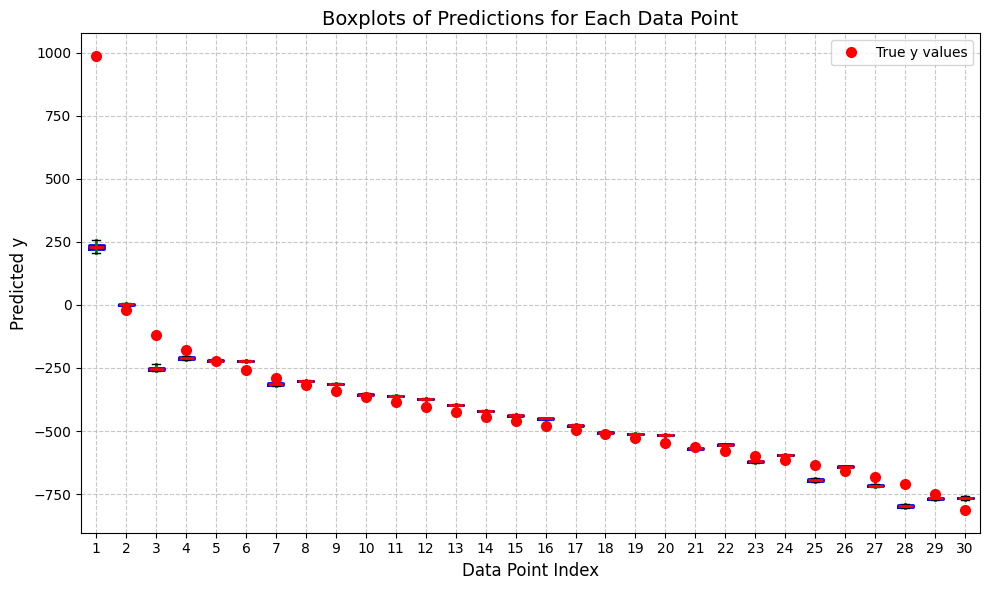

In [19]:
plt.figure(figsize=(10, 6))

boxprops = dict(color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='green', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none')

plt.boxplot(predictions, showfliers=False, boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, flierprops=flierprops)

plt.plot(np.arange(1, 31), strd_test['y'], 'ro', label='True y values', markersize=7)

plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Predicted y', fontsize=12)
plt.title('Boxplots of Predictions for Each Data Point', fontsize=14)

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [20]:
prediction_variances = np.var(predictions, axis=0)
true_y = (strd_test['y'])

print("Variance of Predictions:", prediction_variances)
print("True y values:", true_y)

Variance of Predictions: [154.33319052  13.37153464  42.14036148  14.17559398   7.55332462
   3.96304137  17.81062786   8.37069098   2.65789896   7.56625652
   2.61487901   2.91093486   2.37324924   3.67105073   2.52246631
   1.125001     4.12360743  17.84613327   2.11854584   3.4409954
   5.83064622   1.7250303    8.48255592   3.40119615  13.28271583
   4.5601296   10.26431244  17.56735117   9.41452946   8.73255865]
True y values: 30430    986.263494
92152    -22.208782
31665   -118.706526
11881   -177.530032
80068   -222.553854
6425    -258.183417
24813   -289.627577
12769   -317.528334
90169   -342.028551
10632   -364.687246
35392   -385.775823
21094   -405.781857
75392   -425.067774
97176   -443.688078
29611   -462.007949
99702   -479.158634
14888   -496.135415
22186   -512.907331
33891   -529.330236
14316   -546.064507
90291   -562.629604
61070   -579.728306
90115   -597.964110
33188   -616.344771
18675   -636.130532
79110   -657.857208
52101   -682.689302
38101   -711.511499
6880

The variance of predictions across the range of y values demonstrates considerable variability, ranging from as low as 1.125 to as high as 154.333. This indicates heterogeneity in prediction precision across different data points, suggesting that the model's performance varies significantly depending on the observed y values.<br>

When comparing the variances of predictions with the true y values, it becomes apparent that the model's predictions generally exhibit higher variability than the actual observations. This discrepancy suggests that the model may not fully capture the underlying patterns present in the data, leading to predictions that deviate from the true values.<br>

Moreover, upon closer inspection, there appears to be a bias in the predictions, particularly for data points associated with larger true y values. This bias is evident in the differences between the predicted and true y values, as well as the dispersion of predictions around the true y values.<br>

In conclusion, while the model demonstrates a degree of predictive capability, its performance is characterized by varying levels of variability and potential bias across different segments of the data.

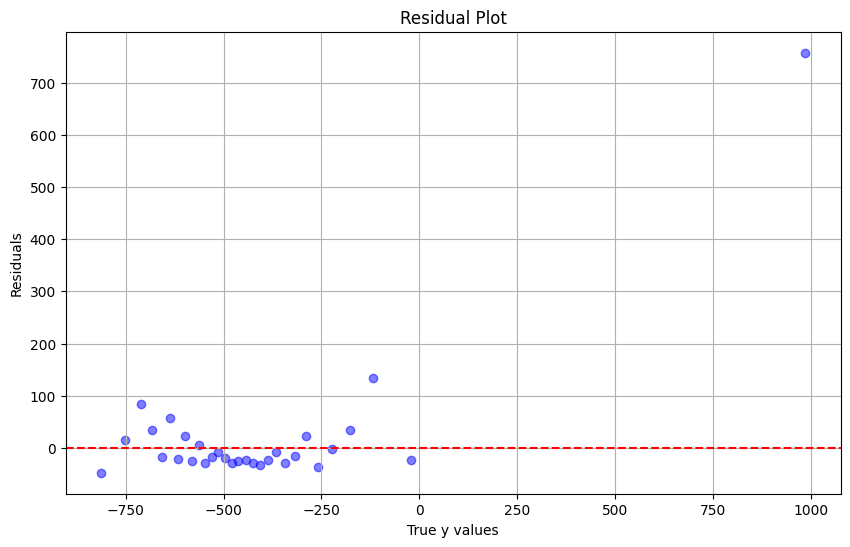

In [21]:
residuals = strd_test['y'] - np.mean(predictions, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(strd_test['y'], residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('True y values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

 The residual plot suggest that the model exhibits bias towards overestimation, with a wide variability in prediction errors. This indicates that while the model captures some of the underlying patterns in the data, it may struggle to accurately predict certain data points, leading to substantial errors in those cases.

### 4) Having more or less features (30p)

Repeat the above experiment with different features according to the cases below:
<br> **For each case start from scratch, they aren't meant to be observed together.**

* Remove the variable that has the most significantly estimated parameter from the training set.

* Add new variables x4 and x5 that have their values randomly sampled from the normal distribution with ($\mu = 20, \sigma = 1.5$) and ($\mu = 10, \sigma = 10$). Include them in linear regression training alongside the 3 features. 

* And finally experiment with adding new features derived from the existing ones. (Like interaction terms and polynomial features.)


**Assess the bias and variance in the predictions made by the linear models you trained in each case. Is there any change compared to your analysis from above?**

**Does adding more features improve the model performance, or reduce variance / bias?**

**Utilize the performance metrics you used in question 2 as well as the function you built to compare these models.**


### (Bonus 10p) 
Force high variance by including higher degrees of polynomial features. Show your results and explain why this happened. <br> *For this to work you need to exclude polynomial powers already present in the data. <br> (Like if cubic terms seem to be present in y, make sure to have features with a polynomial degree bigger than 3).*

In [22]:
max_coef_index = np.argmax(np.abs(linear_reg.coef_))
X_train_reduced = X_train.drop(columns=X_train.columns[max_coef_index])

In [23]:
# Select only relevant features from strd_test_features
strd_test_features_case1 = strd_test_features[['x2', 'x3']]

# Initialize an empty list to store predictions
predictions_case1 = []

# Repeat the process 40 times
for i in range(40):
    # Sample 2000 rows from the reduced training set with a different random state
    X_sampled_reduced = X_train_reduced.sample(n=2000, random_state=i)
    y_sampled = y_train.loc[X_sampled_reduced.index]
    
    # Train a linear regression model using this subset
    model_reduced = LinearRegression()
    model_reduced.fit(X_sampled_reduced, y_sampled)
    
    # Use the trained model to predict strd_test
    predictions_case1.append(model_reduced.predict(strd_test_features_case1))

# Convert predictions to a numpy array for easier manipulation
predictions_case1 = np.array(predictions_case1)

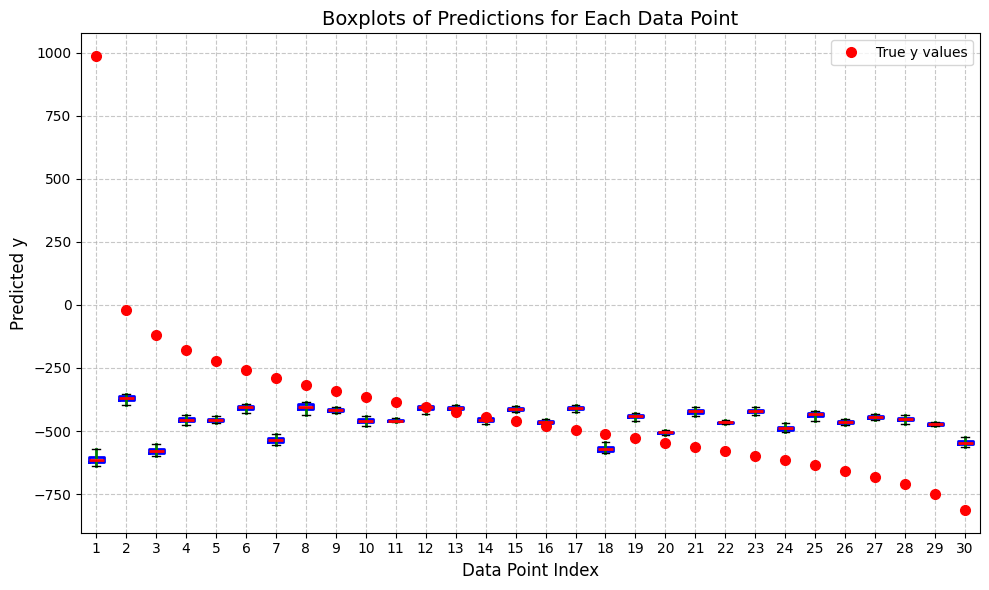

In [24]:
plt.figure(figsize=(10, 6))

boxprops = dict(color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='green', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none')

plt.boxplot(predictions_case1, showfliers=False, boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, flierprops=flierprops)

plt.plot(np.arange(1, 31), strd_test['y'], 'ro', label='True y values', markersize=7)

plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Predicted y', fontsize=12)
plt.title('Boxplots of Predictions for Each Data Point', fontsize=14)

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [25]:
prediction_variances_case1 = np.var(predictions_case1, axis=0)
true_y = (strd_test['y'])

print("Variance of Predictions_case1:", prediction_variances_case1)
print("True y values:", true_y)

Variance of Predictions_case1: [252.38933127 104.5251381  160.96868571 109.15643004  35.22898513
  74.28045463 126.93884733 181.94505064  46.2561739  121.27103225
  27.7499376   91.60892995  49.34545121  75.20192723  45.73824407
  29.44985979  61.94299928 149.67307427  46.18455193  47.25227903
  50.17460508  28.40096202  43.96452999  79.39430446  96.31425391
  51.28201838  29.46090669  78.98882955  32.35233577 108.60928231]
True y values: 30430    986.263494
92152    -22.208782
31665   -118.706526
11881   -177.530032
80068   -222.553854
6425    -258.183417
24813   -289.627577
12769   -317.528334
90169   -342.028551
10632   -364.687246
35392   -385.775823
21094   -405.781857
75392   -425.067774
97176   -443.688078
29611   -462.007949
99702   -479.158634
14888   -496.135415
22186   -512.907331
33891   -529.330236
14316   -546.064507
90291   -562.629604
61070   -579.728306
90115   -597.964110
33188   -616.344771
18675   -636.130532
79110   -657.857208
52101   -682.689302
38101   -711.5114

In [26]:
from sklearn.metrics import mean_absolute_error

def calculate_mae(predictions, true_y):
    """
    Calculate Mean Absolute Error (MAE) for predictions.

    Parameters:
    predictions (numpy array): Array containing predictions for each data point.
    true_y (numpy array): Array containing the true y values.

    Returns:
    mae (float): Mean Absolute Error.
    """
    mae = mean_absolute_error(true_y, predictions)
    return mae

# Calculate MAE for Third Question case
mae_third = calculate_mae(np.mean(predictions, axis=0), strd_test['y'])

# Calculate MAE for Case 1
mae_case1 = calculate_mae(np.mean(predictions_case1, axis=0), strd_test['y'])

print("Mean Absolute Error for Third Question:", mae_third)
print("Mean Absolute Error for Case 1:", mae_case1)

Mean Absolute Error for Third Question: 54.192231014766655
Mean Absolute Error for Case 1: 200.4102390504244


The Third Question model demonstrates relatively lower prediction variability and smaller prediction errors (as indicated by the lower MAE) compared to Case 1. This suggests that the Third Question model performs better and is more consistent in predicting the target variable compared to Case 1.

In [27]:
# Generate new variables x4 and x5 for strd_test
np.random.seed(42)  # Set random seed for reproducibility
x4 = np.random.normal(loc=20, scale=1.5, size=len(X_train))
x5 = np.random.normal(loc=10, scale=10, size=len(X_train))
X_train_case2 = X_train.copy()
X_train_case2['x4'] = x4
X_train_case2['x5'] = x5
x4_test = np.random.normal(loc=20, scale=1.5, size=strd_test.shape[0])
x5_test = np.random.normal(loc=10, scale=10, size=strd_test.shape[0])

strd_test_features_case2 = pd.DataFrame({
    'x1': strd_test['x1'],
    'x2': strd_test['x2'],
    'x3': strd_test['x3'],
    'x4': x4_test,
    'x5': x5_test
})

In [28]:
predictions_case2 = []

# Repeat the process 40 times
for i in range(40):
    # Sample 2000 rows from the training set with a different random state
    X_sampled_new = X_train_case2.sample(n=2000, random_state=i)
    y_sampled = y_train.loc[X_sampled_new.index]
    
    # Train a linear regression model using this subset
    model_new = LinearRegression()
    model_new.fit(X_sampled_new, y_sampled)
    
    # Use the trained model to predict strd_test
    predictions_case2.append(model_new.predict(strd_test_features_case2))

# Convert predictions to a numpy array for easier manipulation
predictions_case2 = np.array(predictions_case2)


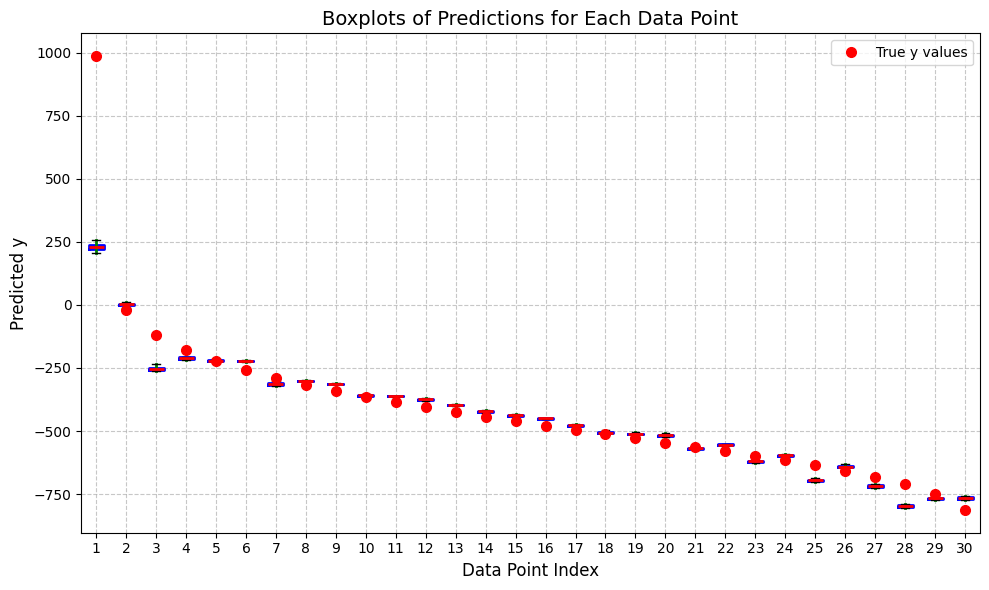

In [29]:
plt.figure(figsize=(10, 6))

boxprops = dict(color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='green', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none')

plt.boxplot(predictions_case2, showfliers=False, boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, flierprops=flierprops)

plt.plot(np.arange(1, 31), strd_test['y'], 'ro', label='True y values', markersize=7)

plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Predicted y', fontsize=12)
plt.title('Boxplots of Predictions for Each Data Point', fontsize=14)

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [30]:
prediction_variances_case2 = np.var(predictions_case2, axis=0)
true_y = (strd_test['y'])

print("Variance of Predictions_case2:", prediction_variances_case2)
print("True y values:", true_y)

Variance of Predictions_case2: [160.86911325  23.7352757   45.75080714  15.22567908   8.73559734
   4.5434985   19.58974064   8.79321436   3.06192923   8.53319372
   2.72673289   6.78668647   2.40940617   6.76974163   4.60572128
   1.67783843   5.12943454  19.76987863   7.24877214   9.42160865
  16.85848317   4.80214089   8.69419423   7.4493212   15.91118782
   9.96138456  11.51910312  18.61987617   8.58650149  13.01197477]
True y values: 30430    986.263494
92152    -22.208782
31665   -118.706526
11881   -177.530032
80068   -222.553854
6425    -258.183417
24813   -289.627577
12769   -317.528334
90169   -342.028551
10632   -364.687246
35392   -385.775823
21094   -405.781857
75392   -425.067774
97176   -443.688078
29611   -462.007949
99702   -479.158634
14888   -496.135415
22186   -512.907331
33891   -529.330236
14316   -546.064507
90291   -562.629604
61070   -579.728306
90115   -597.964110
33188   -616.344771
18675   -636.130532
79110   -657.857208
52101   -682.689302
38101   -711.5114

In [31]:
mae_case2 = calculate_mae(np.mean(predictions_case2, axis=0), strd_test['y'])

print("Mean Absolute Error for Third Question:", mae_third)
print("Mean Absolute Error for Case 2:", mae_case2)

Mean Absolute Error for Third Question: 54.192231014766655
Mean Absolute Error for Case 2: 54.18668289815313


- Both models exhibit similar mean absolute errors, with Case 2 having a slightly lower MAE compared to the Third Question.
- The variances of predictions for Case 2 are slightly higher than those for the Third Question across most values.
- Overall, both models perform similarly in terms of prediction accuracy, as indicated by their comparable mean absolute errors. However, the variance of predictions for Case 2 suggests slightly more variability in its predictions compared to the Third Question.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize the polynomial features transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data to generate polynomial features
X_train_poly = poly_features.fit_transform(X_train)

# Transform the test data using the same polynomial features transformer
X_test_poly = poly_features.transform(X_test)

# Initialize an empty list to store predictions for the fourth case
predictions_poly = []

# Repeat the process 40 times
for i in range(40):
    # Sample 2000 rows from the training set with a different random state
    X_sampled_poly = X_train_poly[np.random.choice(X_train_poly.shape[0], 2000, replace=False)]
    y_sampled = y_train.iloc[np.random.choice(y_train.shape[0], 2000, replace=False)]
    
    # Train a linear regression model using this subset
    model_poly = LinearRegression()
    model_poly.fit(X_sampled_poly, y_sampled)
    
    # Transform the test features to polynomial features
    strd_test_features_poly = poly_features.transform(strd_test_features)
    
    # Use the trained model to predict strd_test
    predictions_poly.append(model_poly.predict(strd_test_features_poly))

# Convert predictions to a numpy array for easier manipulation
predictions_poly = np.array(predictions_poly)

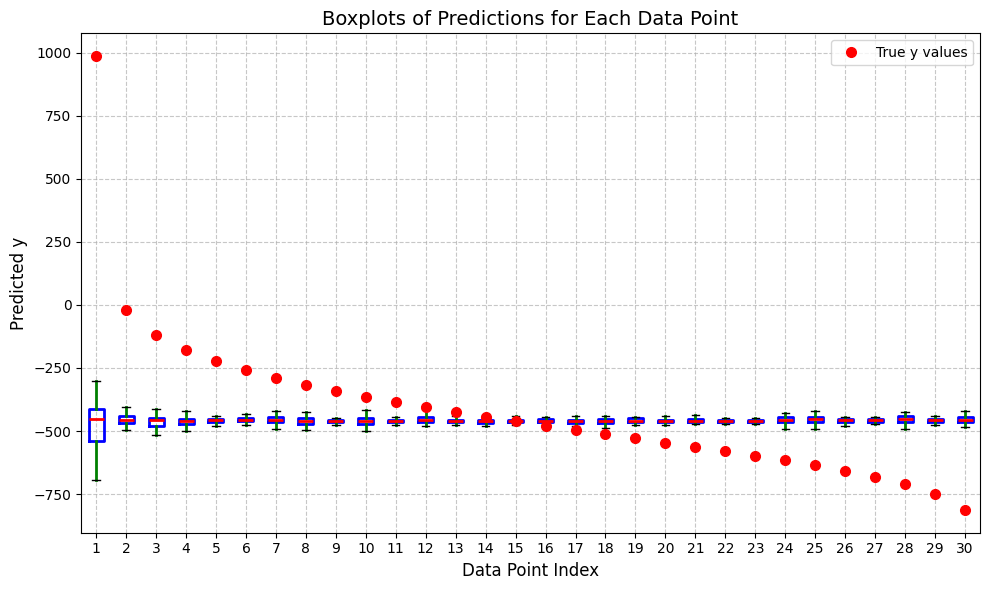

In [33]:
plt.figure(figsize=(10, 6))

boxprops = dict(color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='green', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none')

plt.boxplot(predictions_poly, showfliers=False, boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, flierprops=flierprops)

plt.plot(np.arange(1, 31), strd_test['y'], 'ro', label='True y values', markersize=7)

plt.xlabel('Data Point Index', fontsize=12)
plt.ylabel('Predicted y', fontsize=12)
plt.title('Boxplots of Predictions for Each Data Point', fontsize=14)

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
prediction_variances_poly = np.var(predictions_poly, axis=0)
true_y = (strd_test['y'])

print("Variance of Predictions_poly:", prediction_variances_poly)
print("True y values:", true_y)

Variance of Predictions_poly: [8240.83912598  450.95846379  559.10663249  317.64571249  107.80138711
  157.37020715  244.66890315  441.30134664   52.66642021  311.35750568
   42.73051435  222.75886555   54.3961135    92.54226797   50.12926103
   50.44026363   77.85255183  230.18788456   60.77502201   72.81158654
   68.72036613   44.00502215   75.69365175  176.48853287  311.7985605
   89.45719836   70.79912909  264.31853291   90.14595097  236.30052999]
True y values: 30430    986.263494
92152    -22.208782
31665   -118.706526
11881   -177.530032
80068   -222.553854
6425    -258.183417
24813   -289.627577
12769   -317.528334
90169   -342.028551
10632   -364.687246
35392   -385.775823
21094   -405.781857
75392   -425.067774
97176   -443.688078
29611   -462.007949
99702   -479.158634
14888   -496.135415
22186   -512.907331
33891   -529.330236
14316   -546.064507
90291   -562.629604
61070   -579.728306
90115   -597.964110
33188   -616.344771
18675   -636.130532
79110   -657.857208
52101   -

In [35]:
mae_poly = calculate_mae(np.mean(predictions_poly, axis=0), strd_test['y'])

print("Mean Absolute Error for Third Question:", mae_third)
print("Mean Absolute Error for Poly:", mae_poly)

Mean Absolute Error for Third Question: 54.192231014766655
Mean Absolute Error for Poly: 198.47106341198364


- The Polynomial Case exhibits substantially higher variance of predictions compared to the Third Question across most values, indicating a wider spread of predictions.
- The mean absolute error for the Polynomial Case is notably higher than that of the Third Question, suggesting that the Polynomial Case model's predictions, on average, deviate more from the true values compared to the Third Question model.
- Overall, the Third Question model appears to perform better in terms of prediction accuracy, as indicated by its lower mean absolute error and comparatively lower variance of predictions.

In [36]:
def calculate_metrics(predictions, true_y):
    """
    Calculate performance metrics for predictions.

    Parameters:
    predictions (numpy array): Array containing predictions for each data point.
    true_y (numpy array): Array containing the true y values.

    Returns:
    mse (float): Mean Squared Error.
    r2 (float): R-squared (Coefficient of Determination).
    rmse (float): Root Mean Squared Error.
    """
    mse = mean_squared_error(true_y, predictions)
    r2 = r2_score(true_y, predictions)
    rmse = np.sqrt(mse)
    return mse, r2, rmse

# Calculate metrics for each case
mse_third, r2_third, rmse_third = calculate_metrics(np.mean(predictions, axis=0), strd_test['y'])
mse_case1, r2_case1, rmse_case1 = calculate_metrics(np.mean(predictions_case1, axis=0), strd_test['y'])
mse_case2, r2_case2, rmse_case2 = calculate_metrics(np.mean(predictions_case2, axis=0), strd_test['y'])
mse_poly, r2_poly, rmse_poly = calculate_metrics(np.mean(predictions_poly, axis=0), strd_test['y'])

print("Third Question - Mean Squared Error:", mse_third)
print("Third Question - R-squared (Coefficient of Determination):", r2_third)
print("Third Question - Root Mean Squared Error:", rmse_third)
print()
print("Case 1 - Mean Squared Error:", mse_case1)
print("Case 1 - R-squared (Coefficient of Determination):", r2_case1)
print("Case 1 - Root Mean Squared Error:", rmse_case1)
print()
print("Case 2 - Mean Squared Error:", mse_case2)
print("Case 2 - R-squared (Coefficient of Determination):", r2_case2)
print("Case 2 - Root Mean Squared Error:", rmse_case2)
print()
print("Polynomial Case - Mean Squared Error:", mse_poly)
print("Polynomial Case - R-squared (Coefficient of Determination):", r2_poly)
print("Polynomial Case - Root Mean Squared Error:", rmse_poly)

Third Question - Mean Squared Error: 20596.167827549118
Third Question - R-squared (Coefficient of Determination): 0.7989410913581371
Third Question - Root Mean Squared Error: 143.51365031783254

Case 1 - Mean Squared Error: 119650.99431488871
Case 1 - R-squared (Coefficient of Determination): -0.1680278844245544
Case 1 - Root Mean Squared Error: 345.90604839304086

Case 2 - Mean Squared Error: 20586.870080607558
Case 2 - R-squared (Coefficient of Determination): 0.7990318555657582
Case 2 - Root Mean Squared Error: 143.48125341175256

Polynomial Case - Mean Squared Error: 105441.3530696865
Polynomial Case - R-squared (Coefficient of Determination): -0.029313974882056337
Polynomial Case - Root Mean Squared Error: 324.71734334600376


Overall, the Third Question model demonstrates robust performance compared to Case 1 and the Polynomial Case, exhibiting lower MSE values, higher R-squared values, and lower RMSE values. Case 2 performs similarly to the Third Question in terms of MSE, R-squared, and RMSE, suggesting comparable predictive accuracy.

Polynomial Degree 1:
Mean Squared Error: 2179.2307398922408
Mean Absolute Error: 31.823499065649266
Root Mean Squared Error: 46.682231522199544

Polynomial Degree 2:
Mean Squared Error: 1.011186201991445
Mean Absolute Error: 0.7964674117449128
Root Mean Squared Error: 1.0055775464833356

Polynomial Degree 3:
Mean Squared Error: 1.0113900065251251
Mean Absolute Error: 0.7965505991544857
Root Mean Squared Error: 1.0056788784324373

Polynomial Degree 4:
Mean Squared Error: 1.011512860709729
Mean Absolute Error: 0.7966043967865595
Root Mean Squared Error: 1.0057399568028154

Polynomial Degree 5:
Mean Squared Error: 1.0149762738197359
Mean Absolute Error: 0.7972388662135289
Root Mean Squared Error: 1.0074603088061265

Polynomial Degree 6:
Mean Squared Error: 1.0151642292330991
Mean Absolute Error: 0.7972940898721599
Root Mean Squared Error: 1.007553586283677



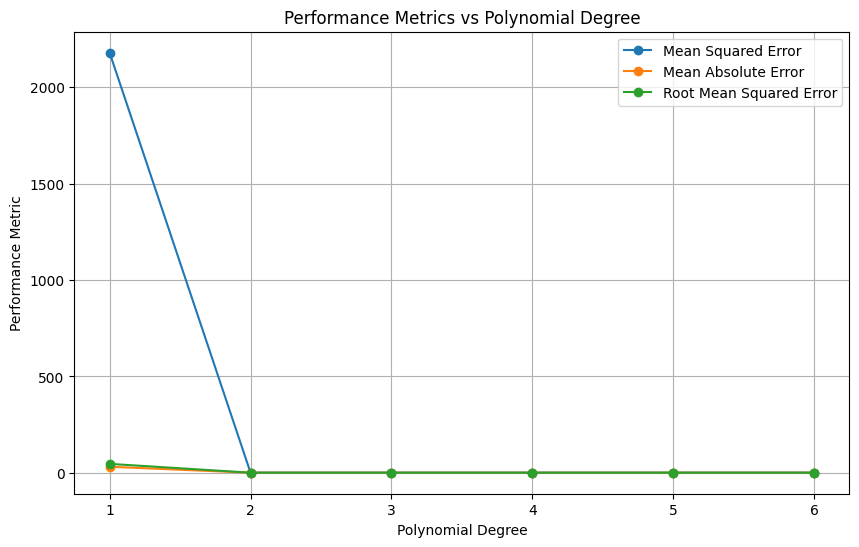

In [37]:
##BONUS
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define a range of polynomial degrees to test
max_degree = 6
degrees = range(1, max_degree + 1)

# Initialize lists to store performance metrics
mse_scores = []
mae_scores = []
rmse_scores = []

for degree in degrees:
    # Generate polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Fit polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    
    # Make predictions
    y_pred_poly = poly_model.predict(X_poly_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred_poly)
    mae = mean_absolute_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Print performance metrics for each degree
for degree, mse, mae, rmse in zip(degrees, mse_scores, mae_scores, rmse_scores):
    print(f"Polynomial Degree {degree}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print()

# Plot the performance metrics vs. polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_scores, label='Mean Squared Error', marker='o')
plt.plot(degrees, mae_scores, label='Mean Absolute Error', marker='o')
plt.plot(degrees, rmse_scores, label='Root Mean Squared Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Performance Metric')
plt.title('Performance Metrics vs Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


In mathematical terms, increasing the polynomial degree adds complexity to the model by introducing more features derived from combinations of the original features. This complexity allows the model to capture nonlinear relationships between the features and the target variable. However, as the degree increases, the model may start to overfit the training data, leading to poor generalization performance on unseen data.

Interpretation and Recommendation:

- Polynomial degree 2 exhibits the best performance across all metrics, striking a balance between bias and variance. It captures more complex patterns in the data than the linear model (degree 1) while avoiding excessive complexity that could lead to overfitting.
- As the polynomial degree increases beyond 2, the performance metrics plateau or slightly deteriorate, indicating diminishing returns in terms of model improvement.
- Higher polynomial degrees introduce more complexity, potentially leading to overfitting, as evidenced by the increasing error metrics beyond degree 2.
- Therefore, polynomial degree 2 is recommended as the optimal choice, offering a good balance between model complexity and generalization performance.

### 5) Changing test size (15p)

Recall the first instruction to split the dataset by a 80/20 ratio. In this final part the effect of choosing different fractions will be discussed.

Before the experiment, randomly sample 2000 rows from the original dataset.

In a double for loop repeat the following steps:

* In `train_test_split` change the `test_size` parameter from 50 to 1950 gradually.

    * For each random split, (different random_state) train a linear regression model 40 times with the training set and record the performance on the test set.

By the end, you will have 40 sets of performance metrics per test set size. With this you can again show the distribution of performance metrics with boxplots. 

**Explain why the boxplots have differing sizes at certain points. Does the mean performance level at each test set size change as well?**

In [38]:
# Randomly sample 2000 rows from the original dataset
sampled_df = df.sample(n=2000, random_state=42)

# Initialize lists to store performance metrics for each test set size
mse_list = []
mae_list = []
rmse_list = []
r_squared_list = []

# Initialize dictionaries to store mean performance metrics for each test set size
mean_metrics = {'Test Size': [], 'Mean MSE': [], 'Mean MAE': [], 'Mean RMSE': [], 'Mean R-squared': []}

# Define the range of test set sizes to iterate over
test_sizes = range(50, 1951, 50)

# Iterate over each test set size
for test_size in test_sizes:
    # Initialize lists to store performance metrics for each random split
    mse_temp = []
    mae_temp = []
    rmse_temp = []
    r_squared_temp = []
    
    # Repeat the process 40 times for each test set size
    for _ in range(40):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(sampled_df.drop(columns=['y']), sampled_df['y'], test_size=test_size, random_state=_)
        
        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r_squared = model.score(X_test, y_test)
        
        # Append the performance metrics to the temporary lists
        mse_temp.append(mse)
        mae_temp.append(mae)
        rmse_temp.append(rmse)
        r_squared_temp.append(r_squared)
    
    # Append the mean performance metrics for each test set size to the main lists
    mse_list.append(mse_temp)
    mae_list.append(mae_temp)
    rmse_list.append(rmse_temp)
    r_squared_list.append(r_squared_temp)
    
    # Calculate mean performance metrics for the current test set size
    mean_mse = np.mean(mse_temp)
    mean_mae = np.mean(mae_temp)
    mean_rmse = np.mean(rmse_temp)
    mean_r_squared = np.mean(r_squared_temp)
    
    # Append the mean performance metrics to the dictionary
    mean_metrics['Test Size'].append(test_size)
    mean_metrics['Mean MSE'].append(mean_mse)
    mean_metrics['Mean MAE'].append(mean_mae)
    mean_metrics['Mean RMSE'].append(mean_rmse)
    mean_metrics['Mean R-squared'].append(mean_r_squared)

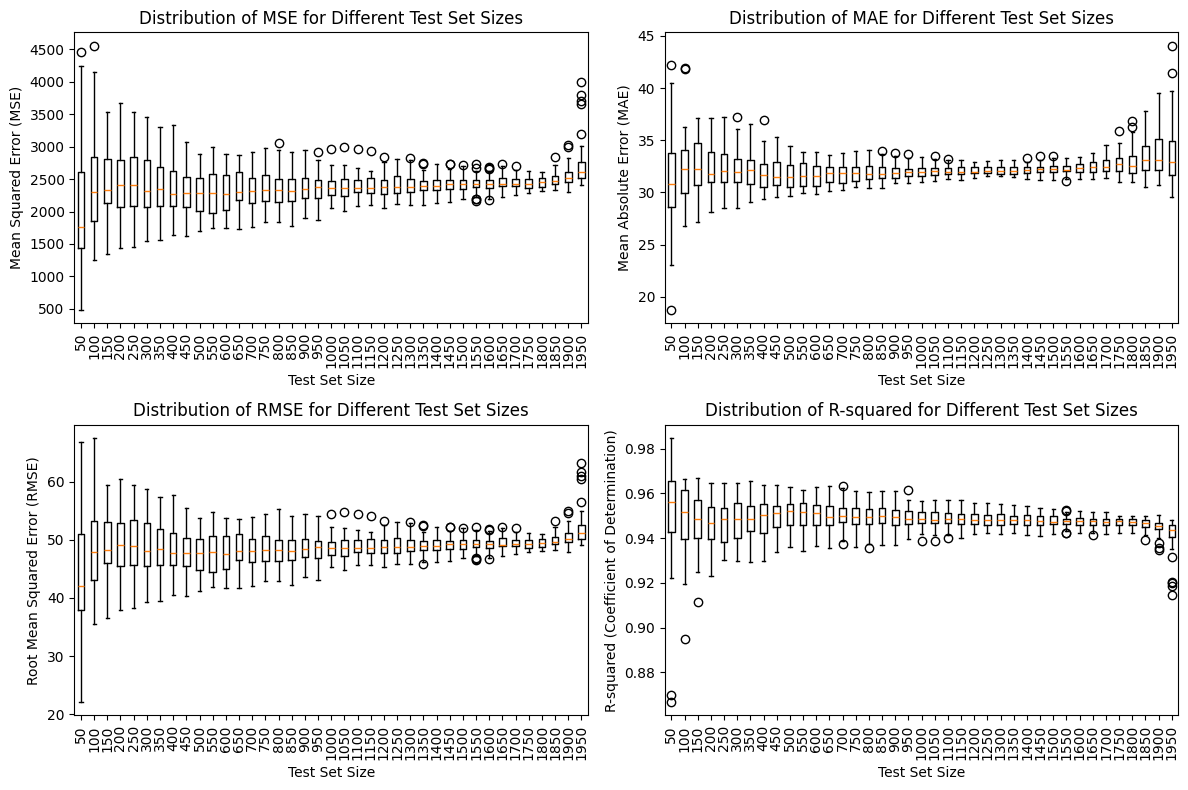

In [39]:
# Visualize the distribution of performance metrics using boxplots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(mse_list)
plt.xlabel('Test Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Distribution of MSE for Different Test Set Sizes')
plt.xticks(ticks=range(1, len(test_sizes)+1), labels=test_sizes, rotation=90)

plt.subplot(2, 2, 2)
plt.boxplot(mae_list)
plt.xlabel('Test Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Distribution of MAE for Different Test Set Sizes')
plt.xticks(ticks=range(1, len(test_sizes)+1), labels=test_sizes, rotation=90)

plt.subplot(2, 2, 3)
plt.boxplot(rmse_list)
plt.xlabel('Test Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Distribution of RMSE for Different Test Set Sizes')
plt.xticks(ticks=range(1, len(test_sizes)+1), labels=test_sizes, rotation=90)

plt.subplot(2, 2, 4)
plt.boxplot(r_squared_list)
plt.xlabel('Test Set Size')
plt.ylabel('R-squared (Coefficient of Determination)')
plt.title('Distribution of R-squared for Different Test Set Sizes')
plt.xticks(ticks=range(1, len(test_sizes)+1), labels=test_sizes, rotation=90)

plt.tight_layout()
plt.show()

The boxplot sizes differ at certain points due to the variability in model performance across different random splits of the data. For smaller test set sizes (e.g., 50, 100), we observe larger variability in performance metrics, resulting in larger boxplots. As the test set size increases, the variability tends to decrease, leading to smaller boxplots. However, beyond a certain test set size (e.g., around 400), the variability in performance metrics remains relatively stable, resulting in consistent boxplot sizes.<br>

Another observation is the presence of more outliers with higher test sizes, especially after 1000. This could be attributed to the fact that with a larger test set size, the model may encounter more diverse and challenging instances, leading to occasional poor performance (higher MSE, MAE, RMSE) in certain splits. These outliers represent instances where the model's performance deviates significantly from the average, possibly due to the complexity or randomness of the data in those splits.

In [40]:
mean_metrics_df = pd.DataFrame(mean_metrics)
mean_metrics_df

,Test Size,Mean MSE,Mean MAE,Mean RMSE,Mean R-squared
0,50,2111.404697,31.216676,44.738368,0.950416
1,100,2362.292821,32.241471,48.069948,0.947926
2,150,2440.065347,32.487181,49.112189,0.947169
3,200,2474.669152,32.565833,49.468346,0.946510
4,250,2443.985142,32.474826,49.194698,0.946970
5,300,2396.974680,32.234093,48.730104,0.947701
6,350,2378.448150,32.146375,48.591154,0.948070
7,400,2321.671851,31.869777,48.016460,0.949071
8,450,2294.253487,31.795531,47.766333,0.950091
9,500,2261.457569,31.680131,47.439898,0.950629


The mean performance level, as indicated by the mean MSE, MAE, RMSE, and R-squared values, does change as the test set size varies.<br>

Generally, the mean MSE, MAE, and RMSE decrease as the test set size increases up to a certain point (around 400-500), indicating better model performance in terms of these metrics with larger test set sizes. This is expected because a larger test set allows for more reliable evaluation of the model's generalization performance.<br>

However, after a certain point (around 1000), we observe a slight increase in the mean performance metrics. This could indicate that with excessively large test set sizes, the model may start overfitting to the test data, resulting in poorer performance on unseen data. This is evident from the decrease in R-squared values after reaching a peak around 400-500 test size.

**We would interpret these findings by noting the trade-off between test set size and model performance. Increasing the test set size generally leads to better evaluation of the model's generalization performance, but excessively large test set sizes may result in overfitting to the test data and poorer performance on unseen data. Additionally, the presence of outliers with larger test sizes suggests the need for robust evaluation methods and possibly reevaluation of the model's complexity or training strategy.**